### Importação das bibliotecas

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

### Carregamento dos dataset de resultados

In [3]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

nome_pasta_resultado= 'resultados1'
raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{nome_pasta_resultado}"

df_gerador = pd.read_csv(f'{raiz}/resultado_geral_gerador.csv', sep=',', engine='python')
df_perf = pd.read_csv(f'{raiz}/resultado_geral_perf.csv', sep=',', engine='python')
#df_sar = pd.read_csv(f'{raiz}/resultado_geral_sar.csv', sep=',', engine='python')

df = pd.concat([df_gerador,df_perf], sort = False)
print(df.columns)


Index(['combined', 'algoritmo', 'packet_size', 'hook_ebpf', 'var_ip',
       'timeout', 'rx_packets', 'rx_packet_rate_avg', 'rx_packet_rate',
       'task_clock', 'context_switches', 'cpu_migrations', 'page_faults',
       'cycles', 'instructions', 'branches', 'branch_misses',
       'L1_dcache_loads', 'L1_dcache_load_misses', 'LLC_loads',
       'LLC_load_misses', 'L1_icache_load_misses', 'dTLB_loads',
       'dTLB_load_misses', 'iTLB_loads', 'iTLB_load_misses'],
      dtype='object')


### Gráfico da pergunta 1

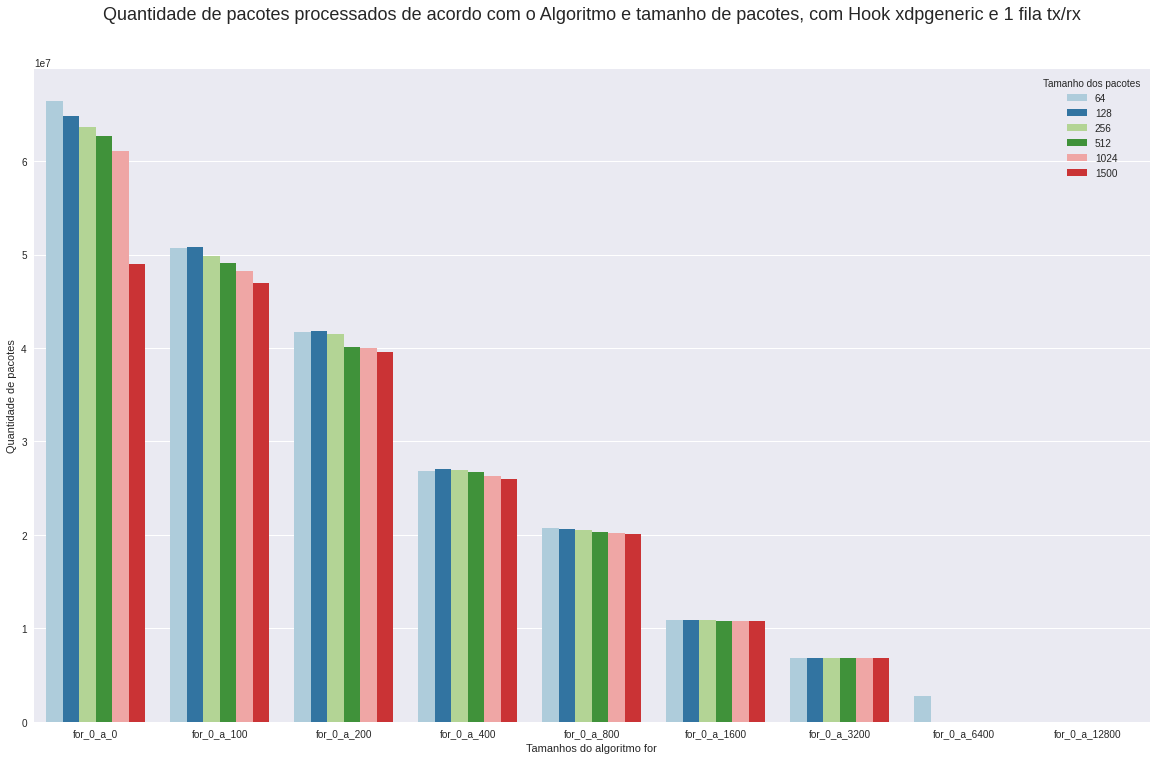

In [26]:
#1ª) Qual a quantidade de pacotes processados quando utilizar laços for de diferentes tamanhos
# com diferentes tamanhos de pacotes (mantendo o mesmo modo xdp e o mesmo combined)
plt.rc('figure', figsize=(20, 12))
it_combined= 1
it_hook_ebpf= "xdpgeneric"
df_pergunta1= df[df.combined == it_combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == it_hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=['rx_packets','algoritmo'], ascending=False)
df_pergunta1= df_pergunta1[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]

ax = sns.barplot(y="rx_packets", x='algoritmo', hue='packet_size', data=df_pergunta1, palette='Paired');
ax.set_title(f'Quantidade de pacotes processados de acordo com o Algoritmo e tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel('Quantidade de pacotes')
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta1.pdf')

### Gráfico da pergunta 2

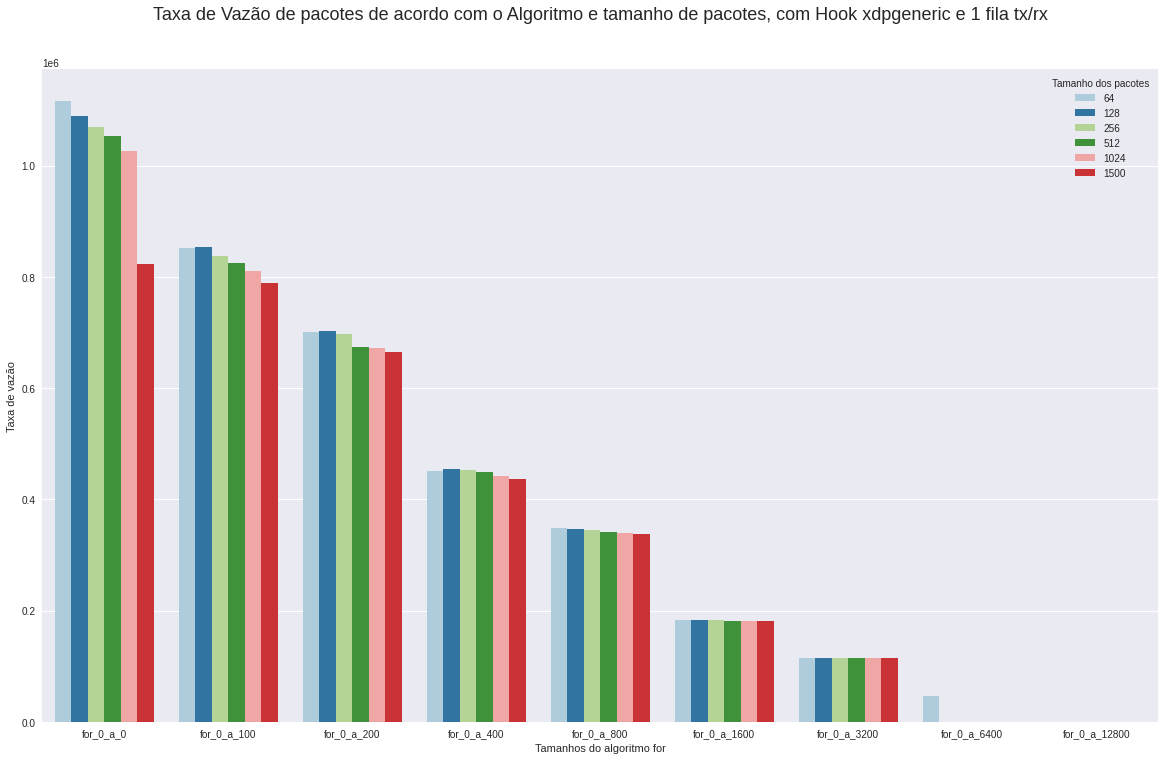

In [36]:
#2ª) Qual a taxa de vazão de pacotes processados quando utilizar laços for de diferentes tamanhos
# com diferentes tamanhos de pacotes (mantendo o mesmo modo xdp e o mesmo combined)
plt.rc('figure', figsize=(20, 12))
it_combined= 1
it_hook_ebpf= "xdpgeneric"
df_pergunta2= df[df.combined == it_combined]
df_pergunta2= df_pergunta2[df_pergunta2.hook_ebpf == it_hook_ebpf]
df_pergunta2= df_pergunta2.sort_values(by=['rx_packet_rate','algoritmo'], ascending=False)
df_pergunta2= df_pergunta2[['algoritmo','packet_size','rx_packets','rx_packet_rate_avg','rx_packet_rate']]
ax = sns.barplot(y="rx_packet_rate", x='algoritmo', hue='packet_size', data=df_pergunta2, palette='Paired');
ax.set_title(f'Taxa de Vazão de pacotes de acordo com o Algoritmo e tamanho de pacotes, com Hook {it_hook_ebpf} e {it_combined} fila tx/rx', fontsize=18, pad=50);
ax.set_ylabel("Taxa de vazão")
ax.set_xlabel('Tamanhos do algoritmo for')
ax.legend(title = "Tamanho dos pacotes")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/pergunta2.pdf')